# 초기 학습 모델 
- 텍스트 전처리<br/>
(1) 정규표현식을 활용한 전처리 (2) Tokenizing 문법적 의미가 있는 최소 단위인 토큰으로 분리 (3) Stemming, 어간 추출 (4) 불용어 제거 (5) 형태소 분석


- 단어 빈도수를 기반으로, 문서를 벡터로 표현하는 방법<br/>
(1) Bag of Words 모델 (2) N-gram 모델 **(3) TF-IDF**


- **머신러닝 기반의 학습 모델**<br/>
(1) 로지스틱 회귀 모델 (2) 트리 모델 
  

- 딥러닝 기반의 학습 모델<br/>
뉴럴 네트워크 모델 - RNN, LSTM, GRU 등등



## 1. 데이터셋 로드

In [1]:
import numpy as np
import pandas as pd

filepath = '../data/Dataset_modified_221209.csv'
dataset = pd.read_csv(filepath)

# 현재 0~7000, 7000 ~ 8000, 14001~ 까지 라벨링됨
valid_class = [0, 1, 2, 3, 4, 5]
# df_labeled = pd.merge(dataset.iloc[0:8001], dataset.iloc[14001:], how='outer')
df_labeled = dataset
df_positive = df_labeled[(df_labeled["label"] == 1) & (df_labeled["label2"] == -1)]
df_negative = df_labeled[(df_labeled["label"] == 0) & (df_labeled["label2"].isin(valid_class))]

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.dpi"] = 200

In [3]:
df_labeled

,id,document,label,label2
0,1,몇년간 잘만 쓰고 있었는데요,0,0
1,2,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
2,3,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
3,4,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
4,5,군대 전역전까지 메롱쓰다가 년 전역후부터 지니 뮤직으로 갈아탄후 계속 사용하고있는 ...,0,3
...,...,...,...,...
21882,21883,다른 곳에 비해 현저히 낮은 해외 음원 등록 문제,0,4
21883,21884,글고 셔플 분명 셔플인데 들은 곡만 주구장창 나옴 재생목록이 곡이 넘는데 정작 듣는...,0,3
21884,21885,기분좋게 노래듣고 싶어도 이럴때마다 짜증이 누적되니까 이제 갈아타야하나 생각까지 듦...,0,3
21885,21886,개같은 인터페이스,0,0


In [6]:
df_positive

,document,label,label2
id,,,
21,그래도 좋은 앱 만들어주셔서 감사합니다,1,-1
25,너무 좋네요,1,-1
26,이번 업데이트 아주 맘에 들어요 ㅠ,1,-1
27,그동안 플레이리스트 편집하려면 너무 귀찮았고 새 곡 추가해도 앨범 다시 열어줘야 했...,1,-1
28,진짜 최고 편해요 ㅠㅠ,1,-1
...,...,...,...
21825,음악을 검색하면 바로 음악을 들을 수 있어서 좋아요,1,-1
21826,업데이트 한 후 기타 미디어 재생 시 노래가 끊기지 않음,1,-1
21867,노래 잘듣고있습니다,1,-1


In [4]:
df_negative

,document,label,label2
id,,,
1,몇년간 잘만 쓰고 있었는데요,0,0
2,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
3,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
4,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
5,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
21877,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
21878,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
21879,기가지니에서는 끊기네요,0,1


## 2. 텍스트 전처리

### 전처리 규칙 
- 문자가 아닌 것들 제거
- 한국어 특유의 반복되는 문자 제거

In [4]:
from konlpy.tag import Okt
import re

okt = Okt()
stopwords_path = "../data/stopwords-ko.txt"

def openStopwords(path:str)->list:
    with open(path, 'r', encoding='utf-8') as f:
        stopwords = f.readlines()
    return [x.strip() for x in stopwords]
    
def preprocessor(text:str) -> str:
    text = re.sub('[\W]+', ' ', text)
    text = re.sub('[ㅋ|ㅠ|ㅜ|ㅎ|ㅇ|ㅡ|ㅅ|ㅂ|!|?|.|,|;]+', ' ', text)
    return text

# Stemming
def tokenizer_porter_kor(text):
    """
        norm : If True, normalize tokens
        stem : If True, stem tokens
    """
    return okt.morphs(text, norm=True, stem=True)

stopwords_ko = openStopwords(stopwords_path)
stopwords_ko.append("지니")

[0.024s][warning][os,thread] Attempt to protect stack guard pages failed (0x000000016d144000-0x000000016d150000).
[0.024s][warning][os,thread] Attempt to deallocate stack guard pages failed.


In [5]:
print(f"before : {df_negative.loc[3, 'document']}")
print(f"after : {preprocessor(df_negative.loc[3, 'document'])}")

before : 대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들이 번거로운게 늘 해맵니다 
after : 대체 좋아요 랑 댓글 위치까진 왜 바꾸는건짘 너무 자주 바뀌는 설정들이 번거로운게 늘 해맵니다 


### 단어 빈도수 기반의 벡터화 TF-IDF vectors

In [6]:
# vectorize texts - TF-IDF Matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=preprocessor,           # 각 텍스트에 대한 전처리 함수
                       tokenizer=tokenizer_porter_kor,      # 어간 추출
                       stop_words=stopwords_ko,             # removing stopwords
                       max_df=0.1,                          # 한 단어가 여러 문서에 등장하는 비율; 해당 비율 이상이면 무시
                       min_df=10)                            # 한 단어가 적어도 min_df개의 문서에는 등장하라

docs_vector = tfidf.fit_transform(df_negative['document'])


/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가다', '각하', '간', '갖다', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '그러하다', '그런', '그렇게', '그렇다', '그치다', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '는', '다', '다르다', '다시', '달다', '답', '대로', '대하', '대해', '더', '더불다', '더욱이', '도', '도달', '도착', '동시', '돼다', '되다', '되어다', '두번째', '뒤', '뒤따르다', '든', '든지', '들다', '듯', '따다', '따르다', '따름', '때문', '라', '라도', '라면', '리하', '마자', '막론', '만', '만으로', '만은', '만이', '만하', '많다', '말', '말다', '망정', '메', '면', '모르다', '몰랏다', '못', '무릎', '미치다', '바', '바꾸다', '밖에', '반대', '방면', '번째', '보다', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '비기다', '비추다', '뿐', '사람', '상대', '생각', '서', '서술', '수', '시오', '시작', '시초', '쓰다', '쓰이다', '아니다', '아래', '아무', '아우르다', '안', '안다', '안되다

In [84]:
# print(docs_vector)

## 3. 머신러닝 기반 분류 모델 

### 훈련-검증 데이터셋 

In [7]:
import numpy as np
import pandas as pd

filepath = '../data/Dataset_modified_221209.csv'
dataset = pd.read_csv(filepath)

valid_class = [0, 1, 2, 3, 4, 5]
# df_labeled = pd.merge(dataset.iloc[0:8001], dataset.iloc[14001:], how='outer')
df_labeled = dataset
df_positive = df_labeled[(df_labeled["label"] == 1) & (df_labeled["label2"] == -1)]
df_negative = df_labeled[(df_labeled["label"] == 0) & (df_labeled["label2"].isin(valid_class))]

- test_size=0.3 : 훈련 데이터셋 70%, 검증 데이터셋 30%으로 분리
- random_state=1 : 시드값 1로 고정
- stratify=y : 전체 데이터셋에서 클래스 별 비율을 맞춰 분할

In [9]:
from sklearn.model_selection import train_test_split

X = df_negative["document"]
y = df_negative["label2"]
# 훈련 데이터셋 70% - 테스트 데이터셋 30% 분할, stratify = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
X_train

20383                                               확인바랍니다
7827                                  출근길 퇴근길에 안되면 진짜 짜증나요
19898    ㅜㅜ 관리자님 계속 노래 안나와서 밑에 검색 개선 올려드리는데 왜 안올라오나요 빨리...
6171     노래선택재생을 해서 항상 노래를 들었는데어느날부터 갑자기 선택재생 안한노래가 막 뒤...
12424             차량연동이 앱때문이면 조만간 다른 걸로 갈아타야할듯 차를 바꿀수는 없으니
                               ...                        
20747    잦은 렉에 튕기는거 까지는 참고 들었는데 핸드폰 과열에 배터리 소모량도 많아서 그냥...
17461                  들어가지는 거랑 편집전에 곡 순서 정할수 있는거 다시 돌려주세요
3139      지금도 제일 많이 쓰는 출근시간인데 거의 분동안 네트워크 원활하지 않다고 안켜지고있어요
18724                                             네트워크연결안됨
5885                곡만 되는거같은데 다른 장소에서도 제 소중한 노래들 다 듣고싶어요ㅠㅠ
Name: document, Length: 13984, dtype: object

In [11]:
y_train

20383    0
7827     0
19898    2
6171     1
12424    1
        ..
20747    2
17461    3
3139     5
18724    5
5885     3
Name: label2, Length: 13984, dtype: int64

In [12]:
X_test

21236                                          어떻게 접속하는건가요
11343    기존에 기기 저장곡파일 지니 스트리밍곡 합쳐놓은 재생목록도 분리될까봐 일부러 어플리...
11615                       갤럭시워치로 휴대폰 없이 런닝하면서 음악 듣고 싶습니닷
19500             폰에 이상은 없는데 노래가 계속 끊겨요 업데이트도 다했는데 왜 그런거예요
4785         왜요 진짜 다시 플레이리스트 만들 수도 없고 만들기도 귀찮은데 무조건 돌려내주세요
                               ...                        
19055                     다시 재생하면 곡 처음부터 시작하고 한두번이어야 참고 쓰죠
16259                                        몇시간동안 사용 못했어요
11630                           내 생전 처음으로 앱 리뷰 남기는데 구려서 남김
9955                                  차가 두대 인데 둘다 증상은 같습니다
10635        잘 쓰다가 뭔 일인지 절전모드 폰 껐다 켜도 안되고 곡 수 지워도 계속 렉 걸려요
Name: document, Length: 5994, dtype: object

3

#### 데이터 분포 검증

In [13]:
series = pd.Series([int(y_train[idx]) for idx in y_train.index])
series

0        0
1        0
2        2
3        1
4        1
        ..
13979    2
13980    3
13981    5
13982    5
13983    3
Length: 13984, dtype: int64

In [14]:
arr = [0, 0, 0, 0, 0, 0]
for idx in series.index:
    arr[series[idx]]+=1
arr

[4434, 2255, 3209, 2655, 406, 1025]

In [15]:
def plotAsPieChart(series):
    series = pd.Series([int(series[idx]) for idx in series.index])
    arr = [0, 0, 0, 0, 0, 0]
    for idx in series.index:
        arr[series[idx]]+=1
    arrSeries = pd.Series(arr)
    # xlabel = ["단순부정", "앱 개발팀", "서비스 개발팀", "서비스 기획팀", "콘텐츠 운영팀", "IT 기획팀"]
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    
    plt.title("클래스 별 부정 라벨링 데이터")
    arrSeries.plot.pie(autopct="%.2f%%", startangle=90, wedgeprops=wedgeprops)
#    plt.pie(ratio, labels = xlabel, autopct="%.1f%%", startangle=90, wedgeprops=wedgeprops)
    plt.figure(figsize=(10,10))
    plt.rcParams["figure.figsize"] = (8,10)
    plt.show()

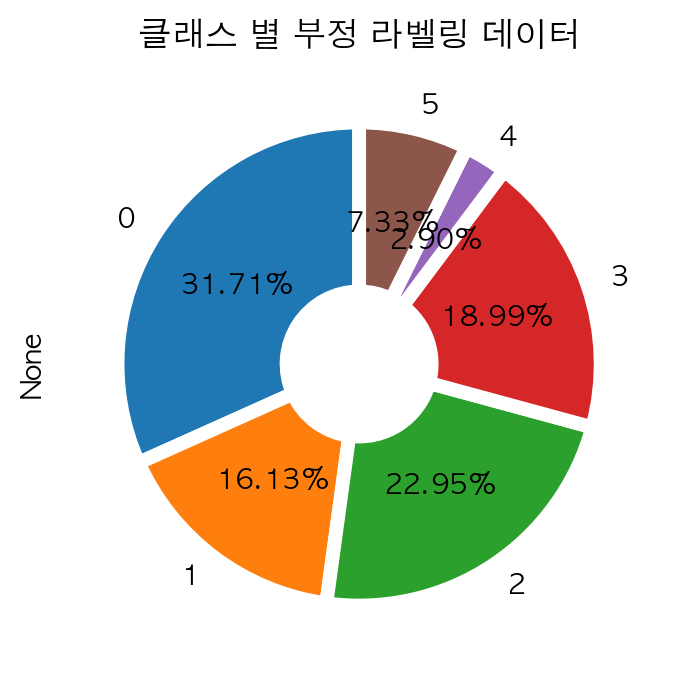

<Figure size 2000x2000 with 0 Axes>

In [16]:
plotAsPieChart(y_train)

### 각 데이터셋에 대해 자연어처리

In [17]:
### from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=preprocessor,           # 각 텍스트에 대한 전처리 함수
                       tokenizer=tokenizer_porter_kor,      # 어간 추출
                       stop_words=stopwords_ko,             # removing stopwords
                       max_df=0.1,                          # 한 단어가 여러 문서에 등장하는 비율; 해당 비율 이상이면 무시
                       min_df=10)                            # 한 단어가 적어도 min_df개의 문서에는 등장하라

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가다', '각하', '간', '갖다', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '그러하다', '그런', '그렇게', '그렇다', '그치다', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '는', '다', '다르다', '다시', '달다', '답', '대로', '대하', '대해', '더', '더불다', '더욱이', '도', '도달', '도착', '동시', '돼다', '되다', '되어다', '두번째', '뒤', '뒤따르다', '든', '든지', '들다', '듯', '따다', '따르다', '따름', '때문', '라', '라도', '라면', '리하', '마자', '막론', '만', '만으로', '만은', '만이', '만하', '많다', '말', '말다', '망정', '메', '면', '모르다', '몰랏다', '못', '무릎', '미치다', '바', '바꾸다', '밖에', '반대', '방면', '번째', '보다', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '비기다', '비추다', '뿐', '사람', '상대', '생각', '서', '서술', '수', '시오', '시작', '시초', '쓰다', '쓰이다', '아니다', '아래', '아무', '아우르다', '안', '안다', '안되다

In [18]:
# data dimension
X_train_vector = X_train_vector.toarray()
X_test_vector = X_test_vector.toarray()
X_train_vector.shape

(13984, 1425)

In [19]:
print(X_train[1])
print(X_train_vector[1])

최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요 
[0. 0. 0. ... 0. 0. 0.]


### Logistic Regression

In [40]:
# train using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2", verbose=1)
lr.fit(X_train_vector, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        23478     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50560D+04    |proj g|=  2.10333D+03

At iterate   50    f=  1.30054D+04    |proj g|=  9.79980D+00

At iterate  100    f=  1.29323D+04    |proj g|=  6.33394D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
23478    100    108      1     0     0   6.334D-01   1.293D+04
  F =   12932.342863599186     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(verbose=1)

In [41]:
# train score
lr.score(X_train_vector, y_train)

0.7365560640732265

In [42]:
# test score
lr.score(X_test_vector, y_test)

0.6291291291291291

In [43]:
# sentiment prediction example 
reviews = ["네트워크에 문제가 많네요", 
          "네트워크 개발 어떻게 하시는건가요", 
          "서버 개발 잘 좀 해주세요"]

reviews_tfidf = tfidf.transform(reviews)
lr.predict(reviews_tfidf)

array([5, 5, 2])

### Decision Tree

In [24]:
# train using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train_vector, y_train)

DecisionTreeClassifier(max_depth=20)

In [25]:
# train score
tree.score(X_train_vector, y_train)

0.6362986270022883

In [26]:
# test score
tree.score(X_test_vector, y_test)

0.5358692025358692

In [34]:
# finding most important terms
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(10):
    print("%2d. %-30s %f" % (f+1, 
                             [w for w, n in tfidf.vocabulary_.items() if n == indices[f]],
                             importances[indices[f]]))

 1. ['네트워크']                       0.172392
 2. ['로그인']                        0.081052
 3. ['기능']                         0.056654
 4. ['좋다']                         0.048807
 5. ['끊기다']                        0.030463
 6. ['목록']                         0.025995
 7. ['멈추다']                        0.024617
 8. ['서버']                         0.023547
 9. ['뜨다']                         0.021293
10. ['연결']                         0.020493


### 정확도 개선하기
- ngram 범위를 늘려주면?

In [35]:
### from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=preprocessor,           # 각 텍스트에 대한 전처리 함수
                       tokenizer=tokenizer_porter_kor,      # 어간 추출
                       stop_words=stopwords_ko,             # removing stopwords
                       ngram_range=(1,3),
                       max_df=0.1,                          # 한 단어가 여러 문서에 등장하는 비율; 해당 비율 이상이면 무시
                       min_df=10)                            # 한 단어가 적어도 min_df개의 문서에는 등장하라

X_train_vector = tfidf.fit_transform(X_train)
X_test_vector = tfidf.transform(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가다', '각하', '간', '갖다', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '그러하다', '그런', '그렇게', '그렇다', '그치다', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '는', '다', '다르다', '다시', '달다', '답', '대로', '대하', '대해', '더', '더불다', '더욱이', '도', '도달', '도착', '동시', '돼다', '되다', '되어다', '두번째', '뒤', '뒤따르다', '든', '든지', '들다', '듯', '따다', '따르다', '따름', '때문', '라', '라도', '라면', '리하', '마자', '막론', '만', '만으로', '만은', '만이', '만하', '많다', '말', '말다', '망정', '메', '면', '모르다', '몰랏다', '못', '무릎', '미치다', '바', '바꾸다', '밖에', '반대', '방면', '번째', '보다', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '비기다', '비추다', '뿐', '사람', '상대', '생각', '서', '서술', '수', '시오', '시작', '시초', '쓰다', '쓰이다', '아니다', '아래', '아무', '아우르다', '안', '안다', '안되다

### Logistic Regression

In [36]:
# train using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2", verbose=1, random_state=1)
lr.fit(X_train_vector, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        23478     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50560D+04    |proj g|=  2.10333D+03

At iterate   50    f=  1.30054D+04    |proj g|=  9.79980D+00

At iterate  100    f=  1.29323D+04    |proj g|=  6.33394D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
23478    100    108      1     0     0   6.334D-01   1.293D+04
  F =   12932.342863599186     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(random_state=1, verbose=1)

In [37]:
# train score
lr.score(X_train_vector, y_train)

0.7365560640732265

In [38]:
# test score
lr.score(X_test_vector, y_test)

0.6291291291291291

In [46]:
# sentiment prediction example 
reviews = ["네트워크에 문제가 많네요",
           "네트워크 서버 개발 좀 제대로 해주세요",
          "노래 재생이 멈췄어요", 
          "아이폰 사용하는데 문제가 많아요",
          "아이폰에서 작동이 안되요",
          "이걸 왜 만듬?",
          "내가 만들어도 잘 만들듯ㅋ",
          "유투브 뮤직 쓸거에요",
          "이용권 결제했는데 제대로 반영이 안되었어요",
          "다크모드가 안보여서 불편해요",
          "UI가 구려요",
          "노래 좀 추가해주세요",
          "노래가 별로 없어요",
          "사용자 편의성 개선해주세요",
          "업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데"]
print(okt.morphs(reviews[0], norm=True, stem=True))
print(okt.morphs(reviews[1], norm=True, stem=True))
print(okt.morphs(reviews[5], norm=True, stem=True))
reviews_tfidf = tfidf.transform(reviews)
# print(reviews_tfidf)

for idx in range(0, len(reviews)):
    print(f"테스트 원문 : {reviews[idx]}, 예측 클래스 : {lr.predict(reviews_tfidf[idx])}")
lr.predict(reviews_tfidf)

['네트워크', '에', '문제', '가', '많다']
['네트워크', '서버', '개발', '좀', '제대로', '해주다']
['이', '걸', '왜', '만듬', '?']
테스트 원문 : 네트워크에 문제가 많네요, 예측 클래스 : [5]
테스트 원문 : 네트워크 서버 개발 좀 제대로 해주세요, 예측 클래스 : [5]
테스트 원문 : 노래 재생이 멈췄어요, 예측 클래스 : [1]
테스트 원문 : 아이폰 사용하는데 문제가 많아요, 예측 클래스 : [0]
테스트 원문 : 아이폰에서 작동이 안되요, 예측 클래스 : [0]
테스트 원문 : 이걸 왜 만듬?, 예측 클래스 : [0]
테스트 원문 : 내가 만들어도 잘 만들듯ㅋ, 예측 클래스 : [3]
테스트 원문 : 유투브 뮤직 쓸거에요, 예측 클래스 : [0]
테스트 원문 : 이용권 결제했는데 제대로 반영이 안되었어요, 예측 클래스 : [0]
테스트 원문 : 다크모드가 안보여서 불편해요, 예측 클래스 : [3]
테스트 원문 : UI가 구려요, 예측 클래스 : [0]
테스트 원문 : 노래 좀 추가해주세요, 예측 클래스 : [4]
테스트 원문 : 노래가 별로 없어요, 예측 클래스 : [0]
테스트 원문 : 사용자 편의성 개선해주세요, 예측 클래스 : [0]
테스트 원문 : 업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데 , 예측 클래스 : [0]


array([5, 5, 1, 0, 0, 0, 3, 0, 0, 3, 0, 4, 0, 0, 0])

In [50]:
tfidf_separate = tfidf.fit_transform(df_negative["document"])

df_tfidf = pd.DataFrame(
    tfidf_separate.toarray(), columns=tfidf.get_feature_names(), index=df_negative.index
)
df_tfidf.to_csv("WordDictTest.csv", encoding="utf-8-sig")

/opt/homebrew/Caskroom/miniforge/base/envs/junho_ML/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Decision Tree

In [212]:
# train using Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20)
tree.fit(X_train_vector, y_train)

DecisionTreeClassifier(max_depth=20)

In [201]:
# train score
tree.score(X_train_vector, y_train)

0.6850709740577582

In [202]:
# test score
tree.score(X_test_vector, y_test)

0.5509365006852444

In [203]:
# finding most important terms
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(10):
    print("%2d. %-30s %f" % (f+1, 
                             [w for w, n in tfidf.vocabulary_.items() if n == indices[f]],
                             importances[indices[f]]))

 1. ['네트워크']                       0.151391
 2. ['로그인']                        0.065791
 3. ['기능']                         0.054982
 4. ['좋다']                         0.039841
 5. ['곡']                          0.035713
 6. ['끊기다']                        0.029427
 7. ['목록']                         0.023072
 8. ['업데이트']                       0.020936
 9. ['계속']                         0.018036
10. ['연결']                         0.017915
